<a href="https://colab.research.google.com/github/PACMAC89/ARDL/blob/main/AlgoTrading_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Looking for the ticker you need and import it

Data Preprocessing
Download & export data tables
Download Microsoft OHLCV with yfinance library
Search for the ticker code

YFinance: https://finance.yahoo.com/

Microsoft: ???

##TECHNISCHE DATEN

In [52]:
%pip install yfinance
import yfinance as yf
import pandas as pd

# Daten laden
ticker = 'MSFT'
df = yf.download(ticker, group_by='ticker')

# 🔍 Index analysieren
print("Aktueller Index:")
print(df.index)
print("\nSpaltennamen:")
print(df.columns)

# 🔧 Index-Bereinigung
if isinstance(df.columns, pd.MultiIndex):
    print("\nMehrstufiger Spaltenindex erkannt. Droplevel wird ausgeführt...")
    df.columns = df.columns.droplevel(0)  # z.B. 'MSFT' aus den Spalten entfernen

if isinstance(df.index, pd.MultiIndex):
    print("\nMultiIndex im Index erkannt. Index wird zurückgesetzt...")
    df = df.reset_index()

# Nur "Date" als Index setzen
if 'Date' in df.columns:
    df = df.set_index('Date')

# 🔁 Final überprüfen
print("\nNach Bereinigung:")
print(df.index)
print("\nSpaltennamen:")
print(df.columns)

[*********************100%***********************]  1 of 1 completed

Aktueller Index:
DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14',
               '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-21',
               '2025-04-22', '2025-04-23'],
              dtype='datetime64[ns]', name='Date', length=9855, freq=None)

Spaltennamen:
MultiIndex([('MSFT',   'Open'),
            ('MSFT',   'High'),
            ('MSFT',    'Low'),
            ('MSFT',  'Close'),
            ('MSFT', 'Volume')],
           names=['Ticker', 'Price'])

Mehrstufiger Spaltenindex erkannt. Droplevel wird ausgeführt...

Nach Bereinigung:
DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '

Visualize the data with plotly
https://plotly.com/python/candlestick-charts/

In [55]:
df

Price,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.054376,0.062373,0.054376,0.059707,1031788800
1986-03-14,0.059707,0.062906,0.059707,0.061839,308160000
1986-03-17,0.061839,0.063439,0.061839,0.062906,133171200
1986-03-18,0.062906,0.063439,0.060773,0.061306,67766400
1986-03-19,0.061306,0.061839,0.059707,0.060240,47894400
...,...,...,...,...,...
2025-04-16,380.670013,381.609985,368.000000,371.609985,21967800
2025-04-17,373.750000,374.320007,366.890015,367.779999,20943700
2025-04-21,362.820007,364.480011,355.670013,359.119995,20807300


In [56]:
%pip install plotly
import plotly.graph_objects as go

go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])])

Export the data
Microsoft data
Drop Adj Close
To not confuse the Close and Adj Close

Preprocess the data
Filter the date range
Since 1 year ago at least

In [57]:
df = df.loc['2020-01-01':].copy()
df

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,151.566850,153.428261,151.137295,153.323257,22622100
2020-01-03,151.127779,152.683721,150.879581,151.414139,21116200
2020-01-06,149.944055,151.872293,149.399942,151.805466,20813700
2020-01-07,152.082316,152.416407,150.173173,150.421356,21634100
2020-01-08,151.710046,153.495104,150.774570,152.817352,27746500
...,...,...,...,...,...
2025-04-16,380.670013,381.609985,368.000000,371.609985,21967800
2025-04-17,373.750000,374.320007,366.890015,367.779999,20943700
2025-04-21,362.820007,364.480011,355.670013,359.119995,20807300


Create the target variable
Percentage change
Percentage change on Adj Close for tomorrow

In [58]:
df['change_tomorrow'] = df['Close'].pct_change(-1)
df.change_tomorrow

,change_tomorrow
Date,
2020-01-02,0.012609
2020-01-03,-0.002578
2020-01-06,0.009202
2020-01-07,-0.015679
2020-01-08,-0.012339
...,...
2025-04-16,0.010414
2025-04-17,0.024115
2025-04-21,-0.020991


If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [59]:
df['Close']

,Close
Date,
2020-01-02,153.323257
2020-01-03,151.414139
2020-01-06,151.805466
2020-01-07,150.421356
2020-01-08,152.817352
...,...
2025-04-16,371.609985
2025-04-17,367.779999
2025-04-21,359.119995


We shall multiply by -1:

In [60]:
df.change_tomorrow = df.change_tomorrow * -1
df

Price,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2020-01-02,151.566850,153.428261,151.137295,153.323257,22622100,-0.012609
2020-01-03,151.127779,152.683721,150.879581,151.414139,21116200,0.002578
2020-01-06,149.944055,151.872293,149.399942,151.805466,20813700,-0.009202
2020-01-07,152.082316,152.416407,150.173173,150.421356,21634100,0.015679
2020-01-08,151.710046,153.495104,150.774570,152.817352,27746500,0.012339
...,...,...,...,...,...,...
2025-04-16,380.670013,381.609985,368.000000,371.609985,21967800,-0.010414
2025-04-17,373.750000,374.320007,366.890015,367.779999,20943700,-0.024115
2025-04-21,362.820007,364.480011,355.670013,359.119995,20807300,0.020991


In [61]:
df.change_tomorrow = df.change_tomorrow * 100
df

Price,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2020-01-02,151.566850,153.428261,151.137295,153.323257,22622100,-1.260859
2020-01-03,151.127779,152.683721,150.879581,151.414139,21116200,0.257782
2020-01-06,149.944055,151.872293,149.399942,151.805466,20813700,-0.920155
2020-01-07,152.082316,152.416407,150.173173,150.421356,21634100,1.567882
2020-01-08,151.710046,153.495104,150.774570,152.817352,27746500,1.233867
...,...,...,...,...,...,...
2025-04-16,380.670013,381.609985,368.000000,371.609985,21967800,-1.041380
2025-04-17,373.750000,374.320007,366.890015,367.779999,20943700,-2.411451
2025-04-21,362.820007,364.480011,355.670013,359.119995,20807300,2.099125


Drop rows with any missing data

In [62]:
df = df.dropna().copy()

In [63]:
df

Price,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2020-01-02,151.566850,153.428261,151.137295,153.323257,22622100,-1.260859
2020-01-03,151.127779,152.683721,150.879581,151.414139,21116200,0.257782
2020-01-06,149.944055,151.872293,149.399942,151.805466,20813700,-0.920155
2020-01-07,152.082316,152.416407,150.173173,150.421356,21634100,1.567882
2020-01-08,151.710046,153.495104,150.774570,152.817352,27746500,1.233867
...,...,...,...,...,...,...
2025-04-15,388.510010,391.890015,384.160004,385.730011,17199900,-3.799690
2025-04-16,380.670013,381.609985,368.000000,371.609985,21967800,-1.041380
2025-04-17,373.750000,374.320007,366.890015,367.779999,20943700,-2.411451


BONUS: how to interpret the distribution of a continuous variable
Based on the following normal distribution:

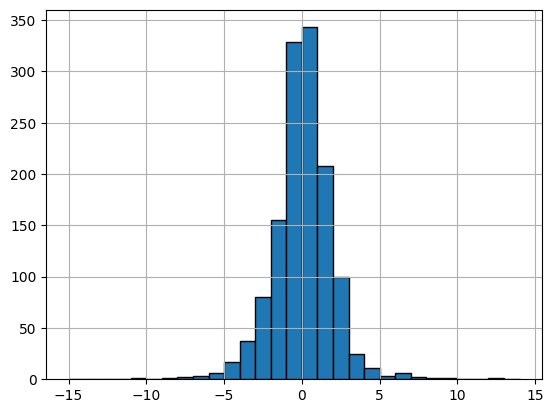

In [64]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

In [65]:
df.change_tomorrow.std()

1.9343105420867415

Change sign
Did the stock go up or down?

In [66]:
import numpy as np
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df

Price,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2020-01-02,151.566850,153.428261,151.137295,153.323257,22622100,-1
2020-01-03,151.127779,152.683721,150.879581,151.414139,21116200,1
2020-01-06,149.944055,151.872293,149.399942,151.805466,20813700,-1
2020-01-07,152.082316,152.416407,150.173173,150.421356,21634100,1
2020-01-08,151.710046,153.495104,150.774570,152.817352,27746500,1
...,...,...,...,...,...,...
2025-04-15,388.510010,391.890015,384.160004,385.730011,17199900,-1
2025-04-16,380.670013,381.609985,368.000000,371.609985,21967800,-1
2025-04-17,373.750000,374.320007,366.890015,367.779999,20943700,-1


Compute Machine Learning model
Proposal: Random Forest within ensemble module of sklearn library

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=20, random_state=42)

y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

model.fit(X, y)

RandomForestClassifier(max_depth=20, random_state=42)

In [68]:
model.score(X, y)

1.0

Backtesting
Create the strategy

In [71]:
%pip install backtesting
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]

        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [72]:
print(X.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11',
               '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17',
               '2025-04-21', '2025-04-22'],
              dtype='datetime64[ns]', name='Date', length=1333, freq=None)


Run the backtest

In [74]:
#from backtesting import Backtest

#X_bt = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
bt = Backtest(X, SimpleClassificationUD, cash=10000,
              commission=.002, exclusive_orders=True)
results = bt.run()

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

In [75]:
results.to_frame('Value').loc[:'Return [%]']

,Value
Start,2020-01-02 00:00:00
End,2025-04-22 00:00:00
Duration,1937 days 00:00:00
Exposure Time [%],99.849962
Equity Final [$],56020836.084847
Equity Peak [$],56263047.756394
Commissions [$],18965439.583061
Return [%],560108.360848


Plot the backtest report
Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [76]:
bt.plot(filename='backtest_report.html')

GridPlot(id='p1327', ...)